In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [3]:
data_df = pd.read_csv('model 1 dataset.csv')

In [5]:
label_encoder = LabelEncoder()

In [6]:
data_df['Country'] = label_encoder.fit_transform(data_df['Country'])

In [7]:
data_df['Quarter'] = data_df['Quarter'].map({'Q1': 1, 'Q2': 2, 'Q3': 3, 'Q4': 4})

In [8]:
scaler = MinMaxScaler()


data_df[['Wildlife Population', 'Deforestation Rate', 'Avg. Temperature (°C)', 'Avg. Humidity (%)']] = scaler.fit_transform(
    data_df[['Wildlife Population', 'Deforestation Rate', 'Avg. Temperature (°C)', 'Avg. Humidity (%)']]
)

In [10]:
print(data_df)

     Country  Year  Quarter  Wildlife Population  Deforestation Rate  \
0          0  2015        1             0.458333            0.500000   
1          0  2015        2             0.500000            0.500000   
2          0  2015        3             0.458333            0.500000   
3          0  2015        4             0.500000            0.500000   
4          0  2016        1             0.500000            0.500000   
..       ...   ...      ...                  ...                 ...   
507        9  2021        4             0.291667            0.666667   
508        9  2022        1             0.250000            0.666667   
509        9  2022        2             0.208333            0.666667   
510        9  2022        3             0.208333            0.666667   
511        9  2022        4             0.208333            0.666667   

     Avg. Temperature (°C)  Avg. Humidity (%)  Outbreak Occurred (0/1)  
0                 0.444444               0.62                 

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
X = data_df[['Country', 'Year', 'Quarter', 'Wildlife Population', 'Deforestation Rate', 'Avg. Temperature (°C)', 'Avg. Humidity (%)']]
y = data_df['Outbreak Occurred (0/1)']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(class_report)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 93.20%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        96
           1       0.00      0.00      0.00         7

    accuracy                           0.93       103
   macro avg       0.47      0.50      0.48       103
weighted avg       0.87      0.93      0.90       103

Confusion Matrix:
[[96  0]
 [ 7  0]]


c:\Users\Winston Moyo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Winston Moyo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Winston Moyo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

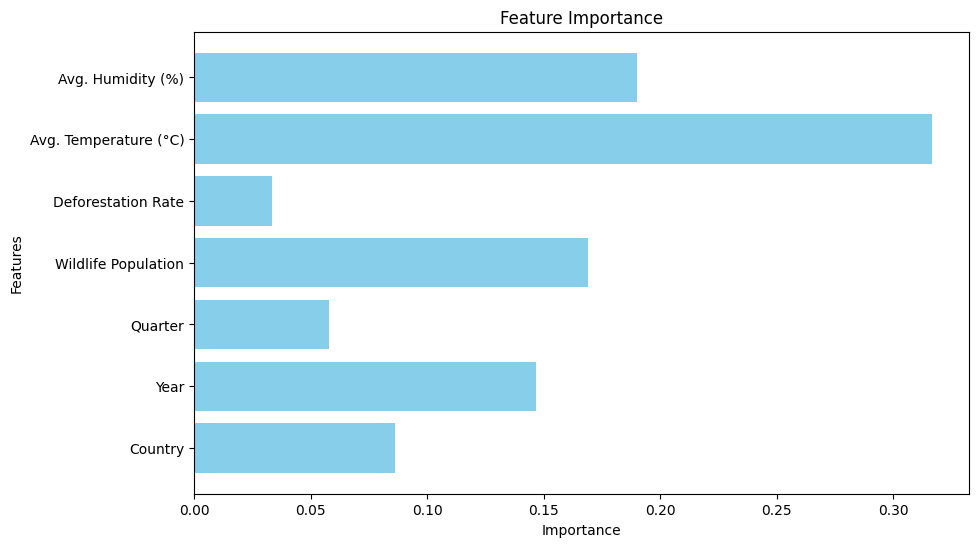

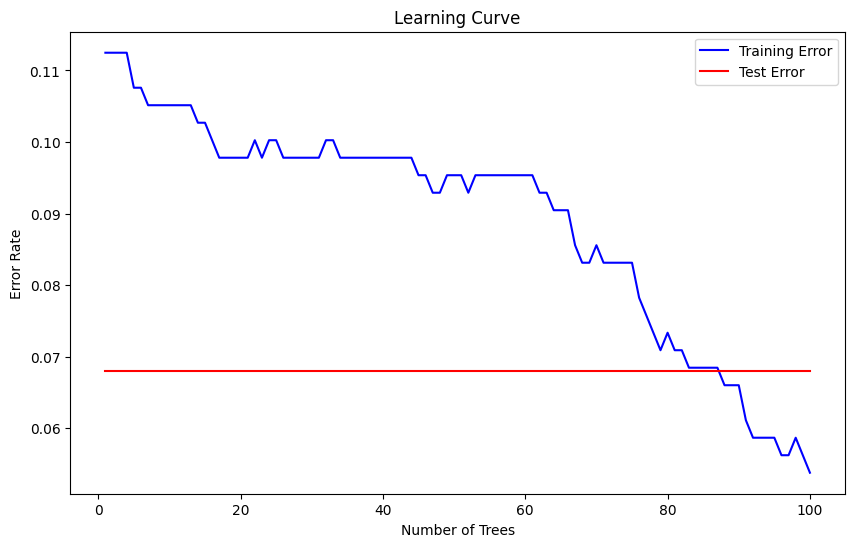

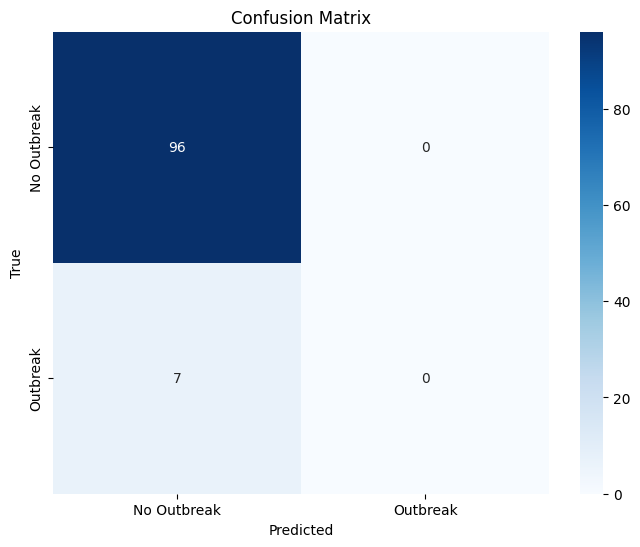

In [19]:
feature_importances = model.feature_importances_

features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

train_errors, test_errors = [], []
for y_train_pred, y_test_pred in zip(model.staged_predict(X_train), model.staged_predict(X_test)):
    train_errors.append(1 - accuracy_score(y_train, y_train_pred))
    test_errors.append(1 - accuracy_score(y_test, y_test_pred))

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_errors) + 1), train_errors, label="Training Error", color="blue")
plt.plot(range(1, len(test_errors) + 1), test_errors, label="Test Error", color="red")
plt.title('Learning Curve')
plt.xlabel('Number of Trees')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Outbreak", "Outbreak"], yticklabels=["No Outbreak", "Outbreak"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [20]:
import joblib

joblib.dump(model, 'model1.pkl')


['model1.pkl']

In [22]:
X_test.to_csv('Model 1 Dataset Prepared.csv', index=False)